## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [3]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [9]:

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in ㄣ    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 12s 243us/step - loss: 2.3041 - accuracy: 0.0979 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 12s 236us/step - loss: 2.3046 - accuracy: 0.0989 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 11s 213us/step - loss: 2.3043 - accuracy: 0.0982 - val_loss: 2.3029 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

50000/50000 [==============================] - 14s 270us/step - loss: 0.4415 - accuracy: 0.8428 - val_loss: 2.0018 - val_accuracy: 0.5277
Epoch 46/50
50000/50000 [==============================] - 10s 207us/step - loss: 0.4243 - accuracy: 0.8465 - val_loss: 2.0948 - val_accuracy: 0.5189
Epoch 47/50
50000/50000 [==============================] - 11s 227us/step - loss: 0.4151 - accuracy: 0.8509 - val_loss: 2.1290 - val_accuracy: 0.5273
Epoch 48/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.3942 - accuracy: 0.8590 - val_loss: 2.2564 - val_accuracy: 0.5226
Epoch 49/50
50000/50000 [==============================] - 13s 260us/step - loss: 0.3718 - accuracy: 0.8653 - val_loss: 2.2448 - val_accuracy: 0.5250
Epoch 50/50
50000/50000 [==============================] - 17s 346us/step - loss: 0.3646 - accuracy: 0.8679 - val_loss: 2.3439 - val_accuracy: 0.5194
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________

50000/50000 [==============================] - 13s 270us/step - loss: 0.9745 - accuracy: 0.6567 - val_loss: 1.3789 - val_accuracy: 0.5253
Epoch 43/50
50000/50000 [==============================] - 13s 257us/step - loss: 0.9547 - accuracy: 0.6652 - val_loss: 1.3803 - val_accuracy: 0.5203
Epoch 44/50
50000/50000 [==============================] - 12s 236us/step - loss: 0.9449 - accuracy: 0.6699 - val_loss: 1.4165 - val_accuracy: 0.5116
Epoch 45/50
50000/50000 [==============================] - 11s 210us/step - loss: 0.9383 - accuracy: 0.6721 - val_loss: 1.3763 - val_accuracy: 0.5266
Epoch 46/50
50000/50000 [==============================] - 10s 207us/step - loss: 0.9210 - accuracy: 0.6793 - val_loss: 1.3605 - val_accuracy: 0.5345
Epoch 47/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.9090 - accuracy: 0.6828 - val_loss: 1.3775 - val_accuracy: 0.5299
Epoch 48/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.8964 - accuracy: 0.6863 - va

50000/50000 [==============================] - 19s 380us/step - loss: 1.6063 - accuracy: 0.4385 - val_loss: 1.6165 - val_accuracy: 0.4370
Epoch 40/50
50000/50000 [==============================] - 13s 258us/step - loss: 1.6007 - accuracy: 0.4413 - val_loss: 1.6126 - val_accuracy: 0.4349
Epoch 41/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.5958 - accuracy: 0.4434 - val_loss: 1.6083 - val_accuracy: 0.4369
Epoch 42/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.5906 - accuracy: 0.4445 - val_loss: 1.6045 - val_accuracy: 0.4386
Epoch 43/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.5862 - accuracy: 0.4457 - val_loss: 1.6014 - val_accuracy: 0.4362
Epoch 44/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.5814 - accuracy: 0.4487 - val_loss: 1.5966 - val_accuracy: 0.4391
Epoch 45/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.5768 - accuracy: 0.4500 - va

50000/50000 [==============================] - 15s 302us/step - loss: 1.9738 - accuracy: 0.3091 - val_loss: 1.9752 - val_accuracy: 0.3110
Epoch 37/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.9689 - accuracy: 0.3115 - val_loss: 1.9703 - val_accuracy: 0.3123
Epoch 38/50
50000/50000 [==============================] - 15s 307us/step - loss: 1.9641 - accuracy: 0.3123 - val_loss: 1.9656 - val_accuracy: 0.3138
Epoch 39/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.9594 - accuracy: 0.3157 - val_loss: 1.9610 - val_accuracy: 0.3165
Epoch 40/50
50000/50000 [==============================] - 15s 307us/step - loss: 1.9549 - accuracy: 0.3162 - val_loss: 1.9566 - val_accuracy: 0.3166
Epoch 41/50
50000/50000 [==============================] - 15s 303us/step - loss: 1.9506 - accuracy: 0.3185 - val_loss: 1.9523 - val_accuracy: 0.3192
Epoch 42/50
50000/50000 [==============================] - 15s 290us/step - loss: 1.9464 - accuracy: 0.3197 - va

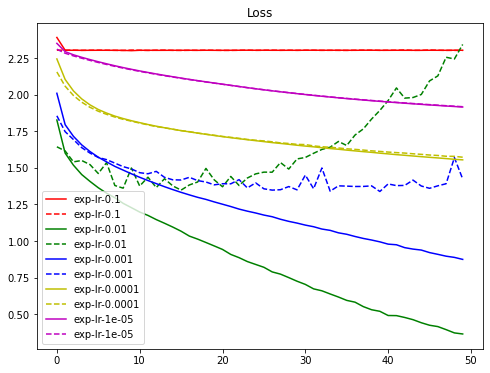

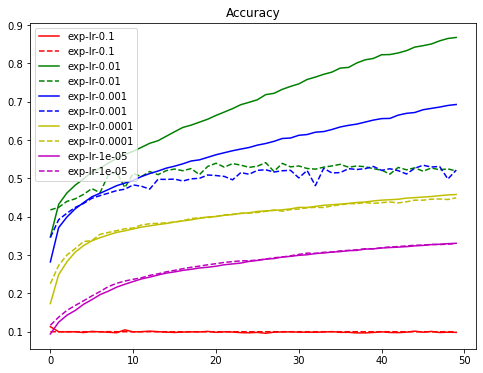

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()


In [11]:

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 14s 272us/step - loss: 2.3048 - accuracy: 0.0997 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 13s 268us/step - loss: 2.3043 - accuracy: 0.1003 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 13s 267us/step - loss: 2.3045 - accuracy: 0.0984 - val_loss: 2.3034 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

Epoch 46/50
50000/50000 [==============================] - 8s 163us/step - loss: 0.6774 - accuracy: 0.7559 - val_loss: 1.6926 - val_accuracy: 0.5175
Epoch 47/50
50000/50000 [==============================] - 9s 170us/step - loss: 0.6815 - accuracy: 0.7548 - val_loss: 1.6638 - val_accuracy: 0.5282
Epoch 48/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.6404 - accuracy: 0.7702 - val_loss: 1.6995 - val_accuracy: 0.5258
Epoch 49/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.6370 - accuracy: 0.7697 - val_loss: 1.7398 - val_accuracy: 0.5327
Epoch 50/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.6194 - accuracy: 0.7768 - val_loss: 1.7447 - val_accuracy: 0.5250
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________

50000/50000 [==============================] - 14s 279us/step - loss: 1.0407 - accuracy: 0.6342 - val_loss: 1.3088 - val_accuracy: 0.5430
Epoch 44/50
50000/50000 [==============================] - 13s 270us/step - loss: 1.0375 - accuracy: 0.6345 - val_loss: 1.3333 - val_accuracy: 0.5250
Epoch 45/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.0187 - accuracy: 0.6416 - val_loss: 1.3233 - val_accuracy: 0.5403
Epoch 46/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.0079 - accuracy: 0.6467 - val_loss: 1.2994 - val_accuracy: 0.5408
Epoch 47/50
50000/50000 [==============================] - 15s 297us/step - loss: 0.9918 - accuracy: 0.6520 - val_loss: 1.3489 - val_accuracy: 0.5356
Epoch 48/50
50000/50000 [==============================] - 11s 222us/step - loss: 0.9934 - accuracy: 0.6503 - val_loss: 1.3266 - val_accuracy: 0.5399
Epoch 49/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.9804 - accuracy: 0.6559 - va

50000/50000 [==============================] - 12s 243us/step - loss: 1.6026 - accuracy: 0.4401 - val_loss: 1.6107 - val_accuracy: 0.4381
Epoch 41/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.5978 - accuracy: 0.4421 - val_loss: 1.6102 - val_accuracy: 0.4396
Epoch 42/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.5929 - accuracy: 0.4438 - val_loss: 1.6043 - val_accuracy: 0.4395
Epoch 43/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.5888 - accuracy: 0.4456 - val_loss: 1.6006 - val_accuracy: 0.4413
Epoch 44/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.5839 - accuracy: 0.4473 - val_loss: 1.5971 - val_accuracy: 0.4423
Epoch 45/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.5799 - accuracy: 0.4481 - val_loss: 1.5993 - val_accuracy: 0.4410
Epoch 46/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.5762 - accuracy: 0.4495 - val

50000/50000 [==============================] - 9s 179us/step - loss: 1.9486 - accuracy: 0.3191 - val_loss: 1.9462 - val_accuracy: 0.3218
Epoch 38/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.9444 - accuracy: 0.3201 - val_loss: 1.9423 - val_accuracy: 0.3222
Epoch 39/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.9404 - accuracy: 0.3214 - val_loss: 1.9383 - val_accuracy: 0.3249
Epoch 40/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.9365 - accuracy: 0.3221 - val_loss: 1.9345 - val_accuracy: 0.3265
Epoch 41/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.9327 - accuracy: 0.3236 - val_loss: 1.9310 - val_accuracy: 0.3257
Epoch 42/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.9291 - accuracy: 0.3248 - val_loss: 1.9274 - val_accuracy: 0.3275
Epoch 43/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.9256 - accuracy: 0.3247 - val_loss:

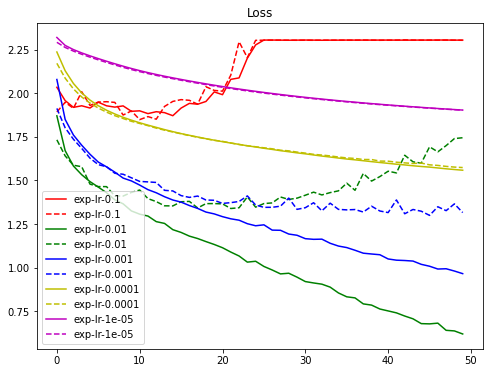

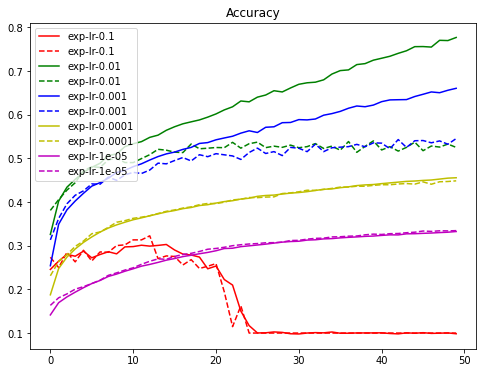

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()